# Bike Sharing Assignment

### 1. Data Loading

#### Import required libraries with relevant versions and load the dataset

In [4]:
!pip install pandas==2.1.4
!pip install numpy==1.26.4
!pip install matplotlib==3.8.0
!pip install seaborn==0.13.2
!pip install sklearn==1.2.2
!pip install statsmodels==0.14.0

ERROR: Ignored the following yanked versions: 0.0.post2
ERROR: Could not find a version that satisfies the requirement sklearn==1.2.2 (from versions: 0.0, 0.0.post1, 0.0.post4, 0.0.post5, 0.0.post7, 0.0.post9, 0.0.post10, 0.0.post11, 0.0.post12)
ERROR: No matching distribution found for sklearn==1.2.2


In [5]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [6]:
#loading the dataset into the pandas dataframe
bike_df = pd.read_csv('day.csv')

### 2. Data Sanity Checks

#### Checking basic information of the dataframe

In [9]:
#checking the number of rows and columns in the dataframe
bike_df.shape

(730, 16)

In [10]:
#displaying the first 5 rows in the dataframe
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
#checking the information on the dataframe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### 3. Problem Statement and Data Analysis

#### Business Understanding
A US bike-sharing provider **BoomBikes** have contracted a consulting company to understand the factors on which the demand of their shared bikes depends. Specifically, they want to understand the factors affecting the demand for the shared bikes in the American market. The company wants to know:
 - Which variables are significant in predicting the demand for shared bikes
 - How well those variables describe the bike demands

#### Problem Statement Analysis:
We are required to model the demand for shared bikes for BoomBikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Grouping the variables into various buckets - categorical, numerical, other and target

In [17]:
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed']
other = ['instant', 'dteday', 'casual', 'registered']
target_var = 'cnt'

##### Filtering the dataset to drop the extra columns not useful for analysis

In [19]:
#instant is index column hence not useful for analysis
#dteday represents the date, since we already have month and year columns, date will be redundant information in the dataset
#casual and registered can be dropped from the dataset since the sum of casual and registered is the target column (as per the data dictionary) and these are not feature variables
bike_df.drop(other, inplace = True, axis = 1)

### 4. Handling Missing Values

#### Missing Values
To handle missing values:
1. **Scenario**: Columns which contain NA only.  
   **Action**: Drop the columns.
2. **Scenario**: Columns which have acceptable range of mising values.  
   **Action**: Impute the values.
    - For numerical columns: Use the median to impute the values.  
      (Reason: Median is a better representative of a distribution than Mean.)  
    - For categorical columns: Use the mode to impute the values.
3. **Scenario**: Columns which have high percentage of missing values.  
   **Action**: Drop the columns since imputation might lead to biased analysis

In [22]:
#checking the average of mean values across all columns
bike_df.isnull().mean()

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

##### Since there are no missing values in the dataset, nothing has to be handled wrt Missing Values

### 5. Segmentation

In [25]:
#identifying number of unique values for the categorical variables
bike_df[categorical_vars].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

#### Tranformation of variables
 - **mnth**: Mapping the *mnth* values to the respective month names.
 - **weekday**: Mapping the *weekday* values to the respective weekday names.
 - **season**: Mapping the *season* values to the respective seasons as per the data dictionary.
 - **weathersit**: Mapping the *weathersit* values to the respective weather conditions as per the data dictionary.

In [27]:
#mapping the categorical variables to their respective values where number of categories > 2
bike_df['mnth'] = bike_df[['mnth']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                                                                    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}))
bike_df['weekday'] = bike_df[['weekday']].apply(lambda x: x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat',
                                                                           5: 'Sun', 6: 'Mon', 0: 'Tues'}))
bike_df['season'] = bike_df[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
bike_df['weathersit'] = bike_df[['weathersit']].apply(lambda x: x.map({1:'clear_cloudy', 2:'mist_cloudy',
                                                                                 3:'light_snow_rain', 4:'heavy_snow_rain'}))

### 6. Analysis

### Univariate Analysis

#### Univariate analysis on numerical variables

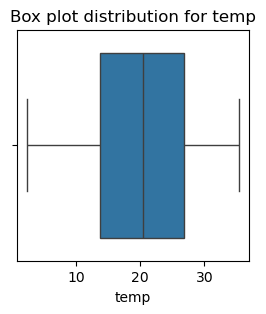

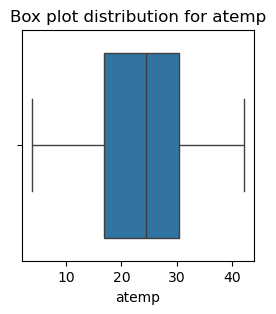

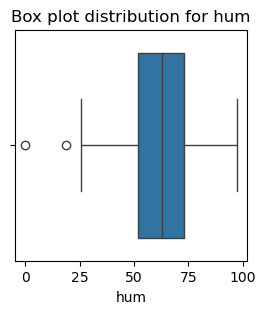

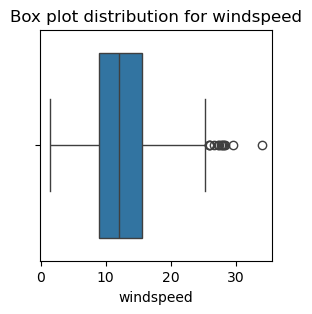

In [31]:
for var in numerical_vars:
    plt.figure(figsize = (3,3))
    sns.boxplot(x = var, data = bike_df)
    plt.title(f"Box plot distribution for {var}")
plt.show()

#### Univariate analysis on categorical variables

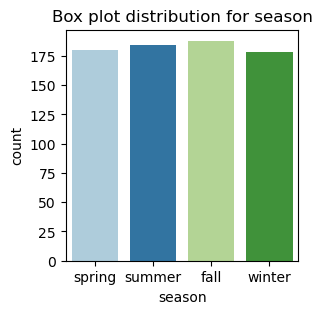

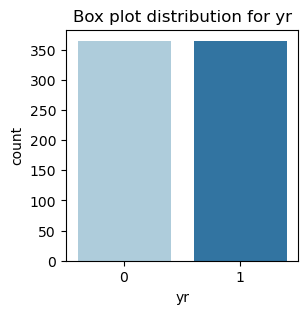

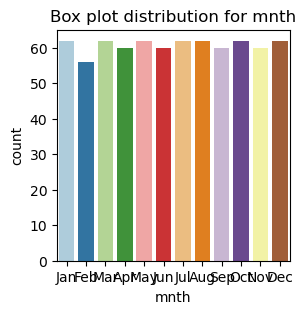

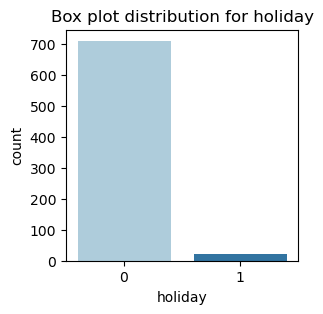

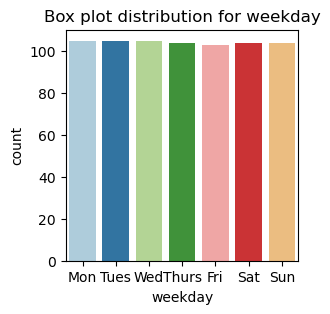

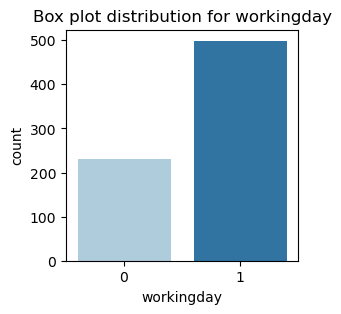

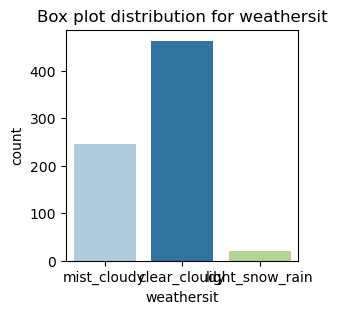

In [33]:
for var in categorical_vars:
    plt.figure(figsize = (3,3))
    sns.countplot(x = var, data = bike_df, palette = 'Paired')
    plt.title(f"Box plot distribution for {var}")
plt.show()

### Bivariate Analysis

#### Bivariate analysis on numerical variables

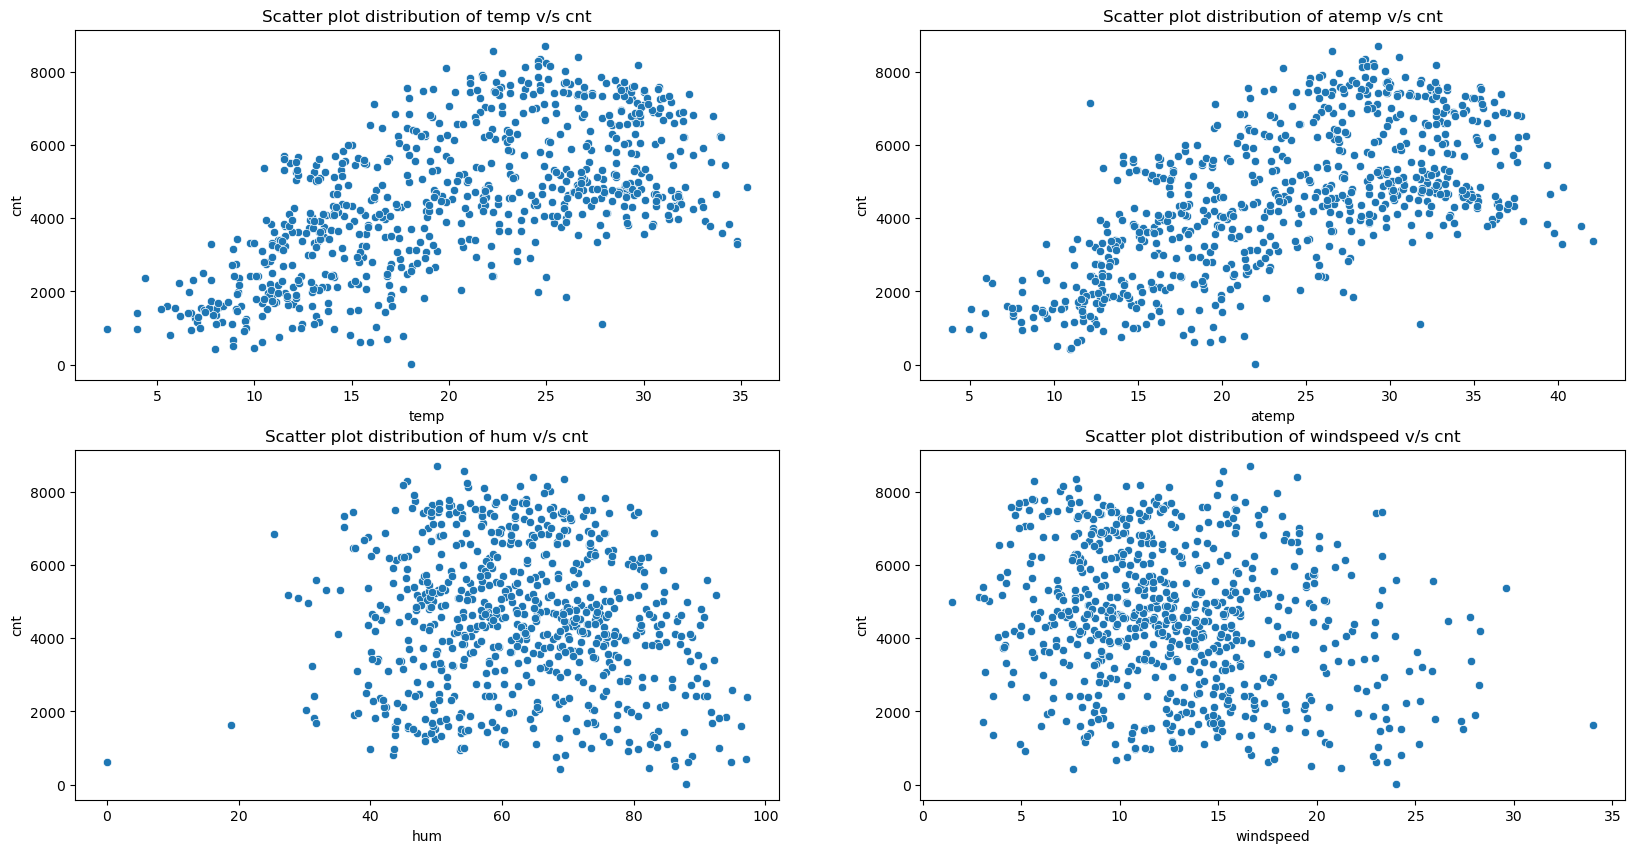

In [36]:
plt.figure(figsize=(20, 10))
for index, var in enumerate(numerical_vars):
    plt.subplot(2,2,index+1)
    sns.scatterplot(x = var, y = 'cnt', data = bike_df)
    plt.title(f"Scatter plot distribution of {var} v/s cnt")
plt.show()

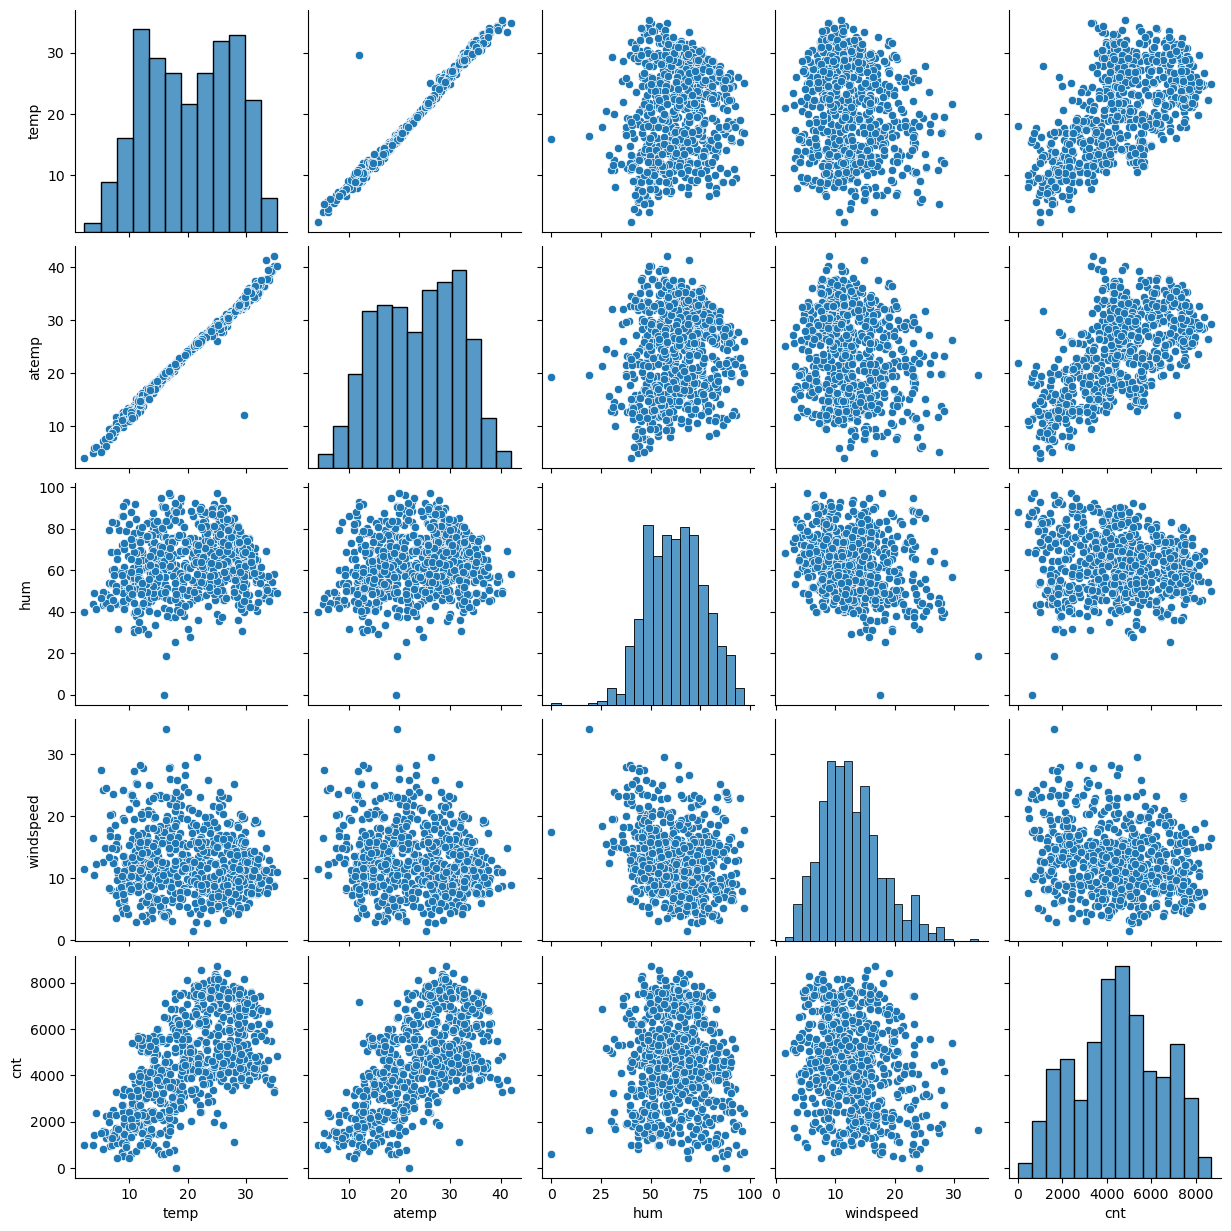

In [37]:
pairplot_vars = numerical_vars+['cnt']
sns.pairplot(bike_df[pairplot_vars])
plt.savefig("pairplot_numerical.png")
plt.show()

##### Observations
 - temp and atemp have positive trend wrt cnt
 - windspeed has slightly negative trend wrt cnt
 - humidity does not seem to have much impact on cnt

#### Bivariate analysis on categorical variables

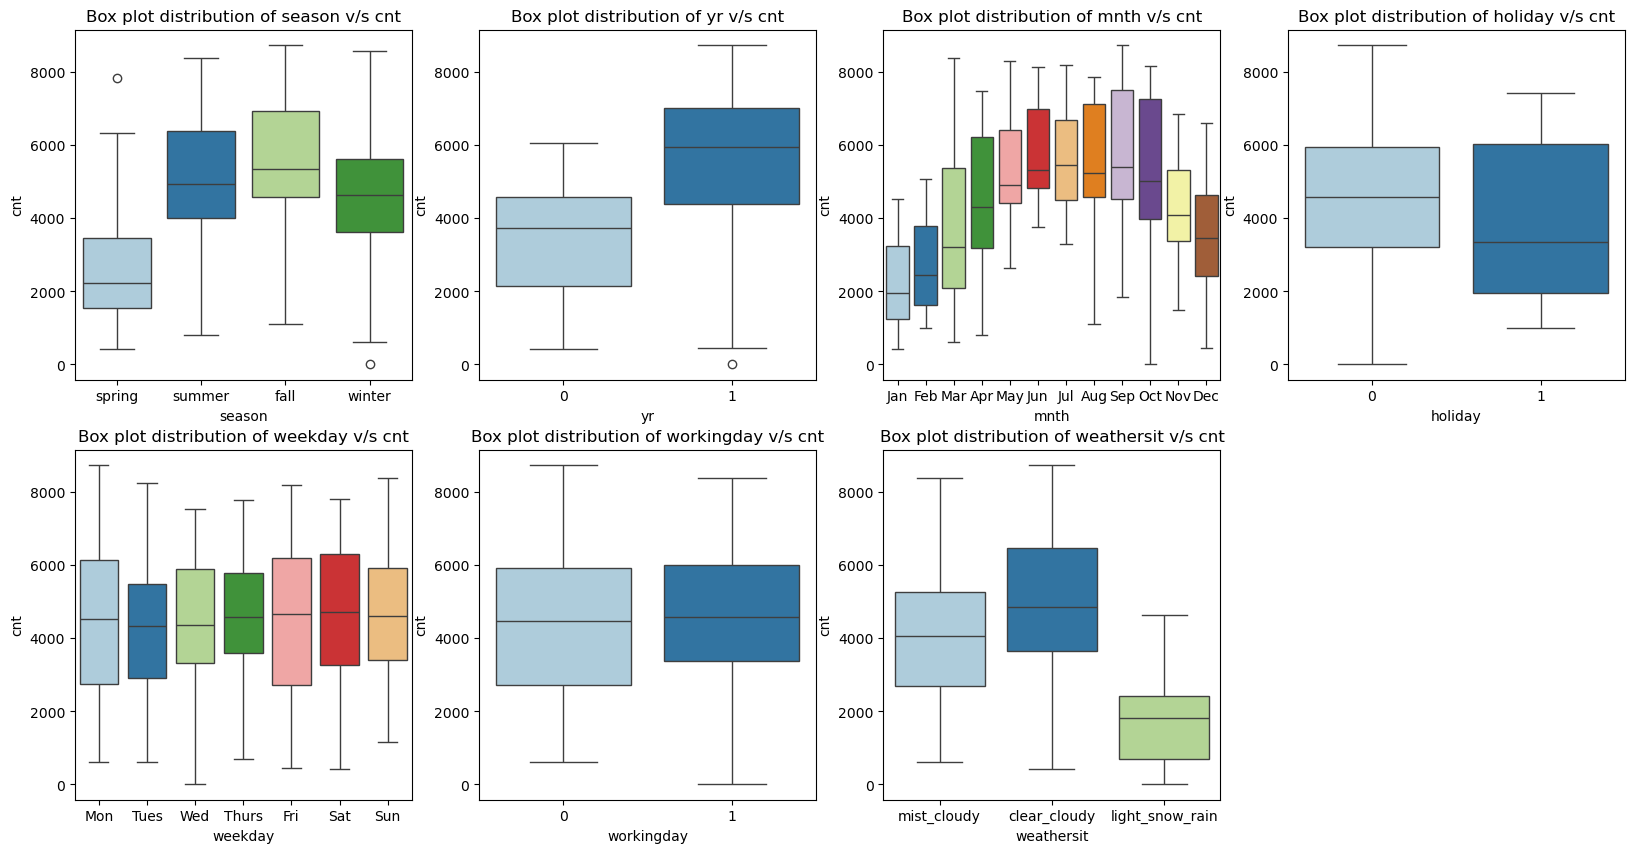

In [40]:
plt.figure(figsize=(20, 10))
for index, var in enumerate(categorical_vars):
    plt.subplot(2,4,index+1)
    sns.boxplot(x = var, y = 'cnt', data = bike_df, palette = 'Paired')
    plt.title(f"Box plot distribution of {var} v/s cnt")
    plt.savefig("categorical.png")
plt.show()

##### Observations
 - spring - When the season is spring, lesser number of shared bikes are used i.e. value of cnt is lower, in the case of fall it is higher
 - yr - For the year 2019,more number of shared bikes are used i.e. the value of cnt is higher than the value it has for the year 2018
 - mnth - For the months from Jan to Dec, the cnt value increases, reaches a high in the middle of the year and then starts going down again towards the end of the year 
 - holiday - When there is no holiday, the value of cnt is higher in general however the spread in the case of holiday days is more wrt cnt
 - workingday - Does not seem to have much impact on cnt
 - weathersit - When there is light snow rain then lesser number of shared bikes are used i.e. cnt is lower

### Multivariate Analysis

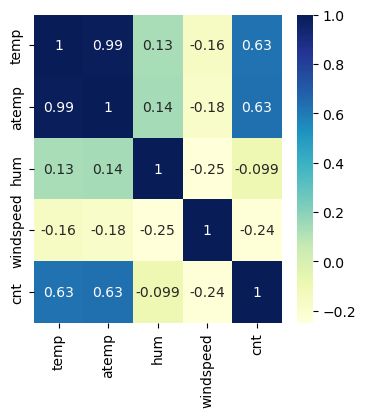

In [43]:
mutivariate_vars = numerical_vars+['cnt']
plt.figure(figsize = (4, 4))
sns.heatmap(bike_df[mutivariate_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observations
 - temp and atemp are highly positively correlated with each other - 0.99
 - temp and atemp have a high positive correlation with the target variable cnt

In [45]:
#to ensure multi collinearity is not there in the model, we can drop one of temp and atemp
bike_df.drop(['atemp'], inplace = True, axis = 1)
numerical_vars.remove('atemp')

### 7. Model creation

#### Creating dummies for categorical variables which have more than 2 unique values

In [48]:
#creating dummies for the variables season, mnth, weekday and weathersit while dropping the first value in each of them
season_dummies = pd.get_dummies(bike_df['season'], drop_first = True, dtype=int)
mnth_dummies = pd.get_dummies(bike_df['mnth'], drop_first = True, dtype=int)
weekday_dummies = pd.get_dummies(bike_df['weekday'], drop_first = True, dtype=int)
weathersit_dummies = pd.get_dummies(bike_df['weathersit'], drop_first = True, dtype=int)

In [49]:
#concatentating the created dummies to the main dataframe
bike_df = pd.concat([bike_df, season_dummies, mnth_dummies, weekday_dummies, weathersit_dummies], axis = 1)

In [50]:
#dropping the original categorical variables which now have their dummies in the dataframe
bike_df.drop(['season', 'mnth', 'weekday', 'weathersit'], inplace = True, axis = 1)

In [51]:
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,light_snow_rain,mist_cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Creating a 70:30 train-test split for model creation

In [53]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Scaling the numerical variables using MinMaxScaler

In [55]:
scaler = MinMaxScaler()
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

In [56]:
#checking the shape of training dataset
df_train.shape

(510, 29)

In [57]:
#checking the shape of test dataset
df_test.shape

(219, 29)

In [58]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,light_snow_rain,mist_cloudy
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [59]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,light_snow_rain,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


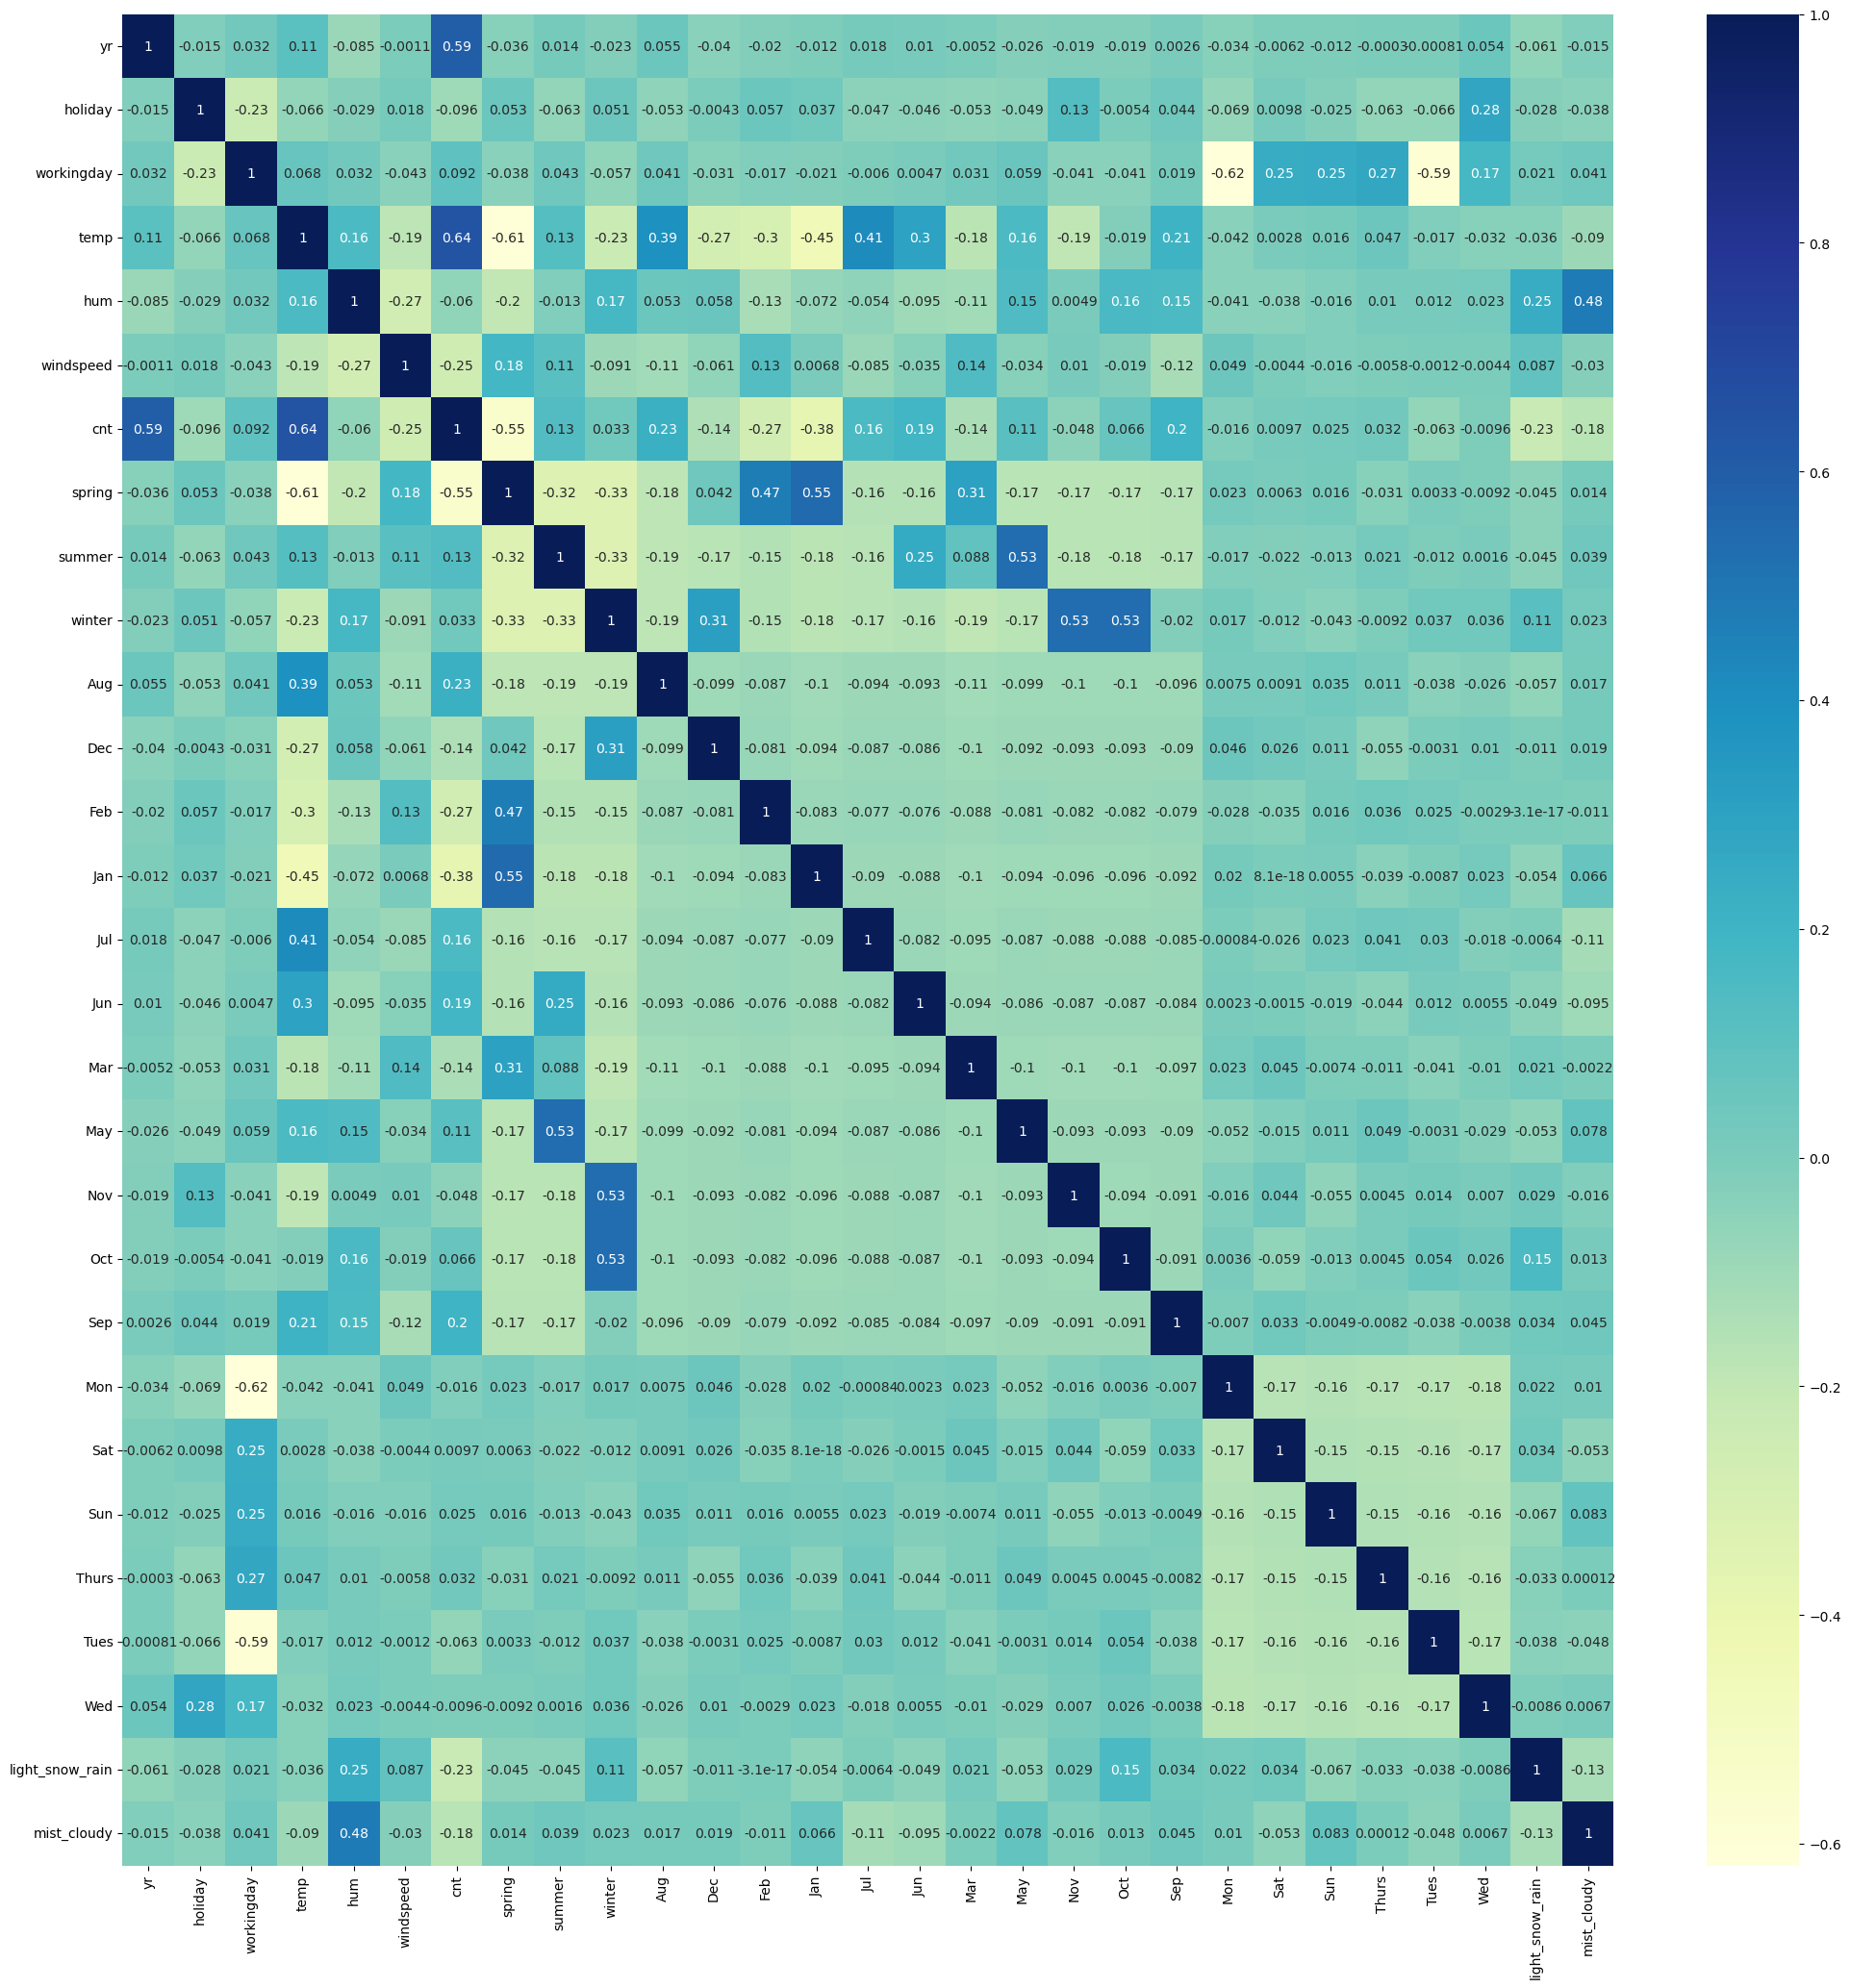

In [60]:
#generating the heatmap for the training dataset with all the numerical and categorical (as dummy) variables to observe impact on cnt
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observations
 - temp is highly positively correlated with the target variable cnt - 0.64
 - yr is highly positively correlated to cnt - 0.59
 - spring season is highly negatively correlated to cnt - -0.55

In [62]:
#creating y_train and X_train
y_train = df_train.pop('cnt')
X_train = df_train

#### Creating a Linear Regression Model and using Recursive Feature Elimination to get the initial set of features

In [64]:
#creating Linear regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)

# using Recursive Feature Elimination to select features from the dataset
rfe = RFE(lm, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [65]:
#getting the ranking for each feature and whether or not it is part of the top 20 features using RFE 
list(zip(X_train.columns, rfe.ranking_,rfe.support_))

[('yr', 1, True),
 ('holiday', 1, True),
 ('workingday', 1, True),
 ('temp', 1, True),
 ('hum', 1, True),
 ('windspeed', 1, True),
 ('spring', 1, True),
 ('summer', 1, True),
 ('winter', 1, True),
 ('Aug', 1, True),
 ('Dec', 1, True),
 ('Feb', 1, True),
 ('Jan', 1, True),
 ('Jul', 1, True),
 ('Jun', 8, False),
 ('Mar', 9, False),
 ('May', 1, True),
 ('Nov', 1, True),
 ('Oct', 5, False),
 ('Sep', 1, True),
 ('Mon', 1, True),
 ('Sat', 7, False),
 ('Sun', 6, False),
 ('Thurs', 4, False),
 ('Tues', 2, False),
 ('Wed', 3, False),
 ('light_snow_rain', 1, True),
 ('mist_cloudy', 1, True)]

In [66]:
#retrieving the top features selected as part of Recursive Feature Elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov',
       'Sep', 'Mon', 'light_snow_rain', 'mist_cloudy'],
      dtype='object')

In [67]:
#updating the training dataset
X_train = X_train[X_train.columns[rfe.support_]]

In [68]:
#defining the generic function to create the Linear Regression Model for the input training dataset
def create_Linear_Regression_Model(X_train):
    """
    X_train: DataFrame - Input training dataframe for which the Linear Regression model has to be trained
    lr: - LR model - Output Linear Regression model for the input training dataframe using statsmodel
    """
    X_train_lm = sm.add_constant(X_train)
    lr = sm.OLS(y_train, X_train_lm).fit()
    return lr

In [69]:
#defining the generic function to calculate Variance Inflation Factor for the input training dataset
def calculate_VIF(X_train):
    """
    X_train: DataFrame - Input training dataframe for which the VIF has to be calculated
    vif: DataFrame - Output dataframe containing the Variation Inflation Factor for the input training dataset in the descending order of the 
    """
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [70]:
#initial VIF values for top selected features after RFE
calculate_VIF(X_train)

,Features,VIF
4,hum,33.37
3,temp,22.20
6,spring,7.44
8,winter,5.99
7,summer,5.89
2,workingday,5.45
5,windspeed,4.94
9,Aug,3.15
13,Jul,2.78
12,Jan,2.42


In [71]:
#to store the list of columns during training that need to be dropped for finding the best fit linear regression model
train_model_dropped_cols = set()

In [72]:
#creating the 1st model after RFE
lr_1 = create_Linear_Regression_Model(X_train)
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.62e-188
Time:                        22:43:26   Log-Likelihood:                -4099.3
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     489   BIC:                             8330.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2545.8116    352.357     

In [73]:
#getting the features where P values is greater than 0.05
lr_1.pvalues[lr_1.pvalues[:]>0.05].sort_values(ascending = False)

Aug        0.530500
May        0.143251
summer     0.112479
Jul        0.097889
Feb        0.097260
spring     0.080253
holiday    0.069849
dtype: float64

In [74]:
calculate_VIF(X_train)

,Features,VIF
4,hum,33.37
3,temp,22.20
6,spring,7.44
8,winter,5.99
7,summer,5.89
2,workingday,5.45
5,windspeed,4.94
9,Aug,3.15
13,Jul,2.78
12,Jan,2.42


#### Observations  
 - **R-squared:** 0.852
 - **Adj. R-squared**: 0.846
 - **Prob (F-statistic)**: 1.62e-188
 - R-squared, Adj. R-squared and Prob (F-statistic) have acceptible values.
 - **P value should be less than 0.05**: Features Aug, May, summer, Jul, Feb, spring, holiday have P values above threshold
 - **VIF should be less than equal to 5**: Features hum, temp, spring, winter, summer and workingday have VIF values above threshold

#### Dropping the feature Aug since it has high P value and retraining the model

In [77]:
#dropping the feature 'Aug'
train_model_dropped_cols.add('Aug')
#creating the 2nd model after RFE
lr_2 = create_Linear_Regression_Model(X_train.drop(list(train_model_dropped_cols), axis = 1))
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.59e-189
Time:                        22:43:26   Log-Likelihood:                -4099.5
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     490   BIC:                             8324.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2616.3965    333.725     

In [78]:
#getting the features where P values is greater than 0.05
lr_2.pvalues[lr_2.pvalues[:]>0.05].sort_values(ascending = False)

May        0.148065
summer     0.111725
Feb        0.097263
holiday    0.068326
dtype: float64

In [79]:
calculate_VIF(X_train.drop(list(train_model_dropped_cols), axis = 1))

,Features,VIF
4,hum,31.79
3,temp,19.84
6,spring,5.62
2,workingday,5.39
5,windspeed,4.88
8,winter,4.12
7,summer,3.43
11,Jan,2.40
18,mist_cloudy,2.33
0,yr,2.10


#### Observations  
 - **R-squared:** 0.852
 - **Adj. R-squared**: 0.847
 - **Prob (F-statistic)**: 1.59e-189
 - R-squared, Adj. R-squared and Prob (F-statistic) have acceptible values
 - **P value should be less than 0.05**: Features May, summer, Feb, holiday have P values above threshold
 - **VIF should be less than equal to 5**: Features hum, temp, spring and workingday have VIF values above threshold

#### Dropping the feature May since it has high P value and retraining the model

<!-- #### Dropping an additional feature and retraining the model
 - There is no feature overlapping which has both higher P value and higher VIF value
 - Dropping the feature *Jul* since it has highest P value and above threshold
 - Retraining the model -->

In [83]:
#dropping the feature 'May'
train_model_dropped_cols.add('May')
#creating the 3rd model after RFE
lr_3 = create_Linear_Regression_Model(X_train.drop(list(train_model_dropped_cols), axis = 1))
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.55e-190
Time:                        22:43:26   Log-Likelihood:                -4100.6
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     491   BIC:                             8320.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2519.2988    327.290     

In [84]:
#getting the features where P values is greater than 0.05
lr_3.pvalues[lr_3.pvalues[:]>0.05].sort_values(ascending = False)

Feb        0.112260
holiday    0.063963
dtype: float64

In [85]:
calculate_VIF(X_train.drop(list(train_model_dropped_cols), axis = 1))

,Features,VIF
4,hum,31.76
3,temp,19.75
6,spring,5.61
2,workingday,5.38
5,windspeed,4.79
8,winter,4.12
7,summer,2.88
11,Jan,2.40
17,mist_cloudy,2.33
0,yr,2.10


#### Observations  
 - **R-squared:** 0.852
 - **Adj. R-squared**: 0.846
 - **Prob (F-statistic)**: 3.55e-190
 - R-squared, Adj. R-squared and Prob (F-statistic) have acceptible values
 - **P value should be less than 0.05**: Features Feb and holiday have P values above threshold
 - **VIF should be less than equal to 5**: Features hum, temp, spring, and workingday have VIF values above threshold

#### Dropping the feature Feb since it has high P value and retraining the model

<!-- #### Dropping an additional feature and retraining the model
 - There is no feature overlapping which has both higher P value and higher VIF value
 - Dropping the feature *May* since it has highest P value and above threshold
 - Retraining the model -->

In [89]:
#dropping the feature 'Feb'
train_model_dropped_cols.add('Feb')
#creating the 4th model after RFE
lr_4 = create_Linear_Regression_Model(X_train.drop(list(train_model_dropped_cols), axis = 1))
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          9.55e-191
Time:                        22:43:26   Log-Likelihood:                -4101.9
No. Observations:                 510   AIC:                             8240.
Df Residuals:                     492   BIC:                             8316.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2420.2640    321.816     

In [90]:
#getting the features where P values is greater than 0.05
lr_4.pvalues[lr_4.pvalues[:]>0.05].sort_values(ascending = False)

holiday    0.053804
dtype: float64

In [91]:
calculate_VIF(X_train.drop(list(train_model_dropped_cols), axis = 1))

,Features,VIF
4,hum,31.16
3,temp,19.14
2,workingday,5.37
5,windspeed,4.78
6,spring,4.57
8,winter,4.12
7,summer,2.87
16,mist_cloudy,2.32
0,yr,2.09
14,Mon,2.00


#### Observations  
 - **R-squared:** 0.851
 - **Adj. R-squared**: 0.846
 - **Prob (F-statistic)**: 9.55e-191
 - R-squared, Adj. R-squared and Prob (F-statistic) have acceptible values
 - **P value should be less than 0.05**: Feature holiday has P value above threshold
 - **VIF should be less than equal to 5**: Features hum, temp, and workingday have VIF values above threshold

#### Dropping the feature hum since it has high VIF value and retraining the model

<!-- #### Dropping an additional feature and retraining the model
 - There is no feature overlapping which has both higher P value and higher VIF value
 - Dropping the feature *holiday* since it has highest P value and above threshold
 - Retraining the model -->

In [95]:
#dropping the feature 'hum'
train_model_dropped_cols.add('hum')
#creating the 5th model after RFE
lr_5 = create_Linear_Regression_Model(X_train.drop(list(train_model_dropped_cols), axis = 1))
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.49e-188
Time:                        22:43:27   Log-Likelihood:                -4109.9
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     493   BIC:                             8326.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1808.0836    286.150     

In [96]:
#getting the features where P values is greater than 0.05
lr_5.pvalues[lr_5.pvalues[:]>0.05].sort_values(ascending = False)

holiday    0.068352
dtype: float64

In [97]:
calculate_VIF(X_train.drop(list(train_model_dropped_cols), axis = 1))

,Features,VIF
3,temp,7.21
2,workingday,5.33
4,windspeed,4.72
5,spring,3.17
7,winter,3.03
6,summer,2.33
0,yr,2.08
13,Mon,1.99
11,Nov,1.81
9,Jan,1.68


#### Observations  
 - **R-squared:** 0.846
 - **Adj. R-squared**: 0.841
 - **Prob (F-statistic)**: 1.49e-188
 - R-squared, Adj. R-squared and Prob (F-statistic) have acceptible values
 - **P value should be less than 0.05**: Feature holiday has P value above threshold
 - **VIF should be less than equal to 5**: Features temp and workingday have VIF values above threshold

#### Dropping the feature holiday since it has high VIF value and retraining the model

In [100]:
#dropping the feature 'holiday'
train_model_dropped_cols.add('holiday')
#creating the 6th model after RFE
lr_6 = create_Linear_Regression_Model(X_train.drop(list(train_model_dropped_cols), axis = 1))
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.71e-189
Time:                        22:43:27   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1759.6017    285.590     

In [101]:
#getting the features where P values is greater than 0.05
lr_6.pvalues[lr_6.pvalues[:]>0.05].sort_values(ascending = False)

Series([], dtype: float64)

In [102]:
calculate_VIF(X_train.drop(list(train_model_dropped_cols), axis = 1))

,Features,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
4,spring,3.09
6,winter,3.02
5,summer,2.32
0,yr,2.08
12,Mon,1.86
10,Nov,1.78
8,Jan,1.67


#### Observations  
 - **R-squared:** 0.845
 - **Adj. R-squared**: 0.840
 - **Prob (F-statistic)**: 5.71e-189
 - R-squared, Adj. R-squared and Prob (F-statistic) have acceptible values
 - **P value should be less than 0.05**: All features have P values within acceptible threshold
 - **VIF should be less than equal to 5**: Feature temp has VIF value above threshold

#### Dropping the feature temp since it has high VIF value and retraining the model

In [105]:
#dropping the feature 'temp'
train_model_dropped_cols.add('temp')
#creating the 7th model after RFE
lr_7 = create_Linear_Regression_Model(X_train.drop(list(train_model_dropped_cols), axis = 1))
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.05e-162
Time:                        22:43:27   Log-Likelihood:                -4178.6
No. Observations:                 510   AIC:                             8387.
Df Residuals:                     495   BIC:                             8451.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4767.4126    163.606     

In [106]:
#getting the features where P values is greater than 0.05
lr_7.pvalues[lr_7.pvalues[:]>0.05].sort_values(ascending = False)

Jul       0.457428
winter    0.324993
dtype: float64

In [107]:
calculate_VIF(X_train.drop(list(train_model_dropped_cols), axis = 1))

,Features,VIF
2,windspeed,4.25
1,workingday,3.55
3,spring,3.03
5,winter,3.00
4,summer,2.25
0,yr,1.91
9,Nov,1.76
7,Jan,1.64
11,Mon,1.63
13,mist_cloudy,1.56


#### Observations  
 - **R-squared:** 0.799
 - **Adj. R-squared**: 0.793
 - **Prob (F-statistic)**: 5.05e-162
 - R-squared, Adj. R-squared and Prob (F-statistic) have acceptible values
 - **P value should be less than 0.05**: All features have P values within acceptible threshold
 - **VIF should be less than equal to 5**: All features have VIF values within acceptible threshold
 - _**Key Observation on removing "temp"**_:
   - _R squared and Adj R-squared have drastically dropped from 84 to 79%._
   - As part of multivariate analysis, in the correlation matrix it was observed that temp is highly positively correlated to the target variable cnt.
   - Hence, it is not a good idea to drop the feature temp and it can be added back to the model:
     - P value is in acceptible rnge
     - VIF is ~6.92 not very high in comparison to acceptible range of 5 and it is less than 10.
     - Two additional features now have higher P value after temp is removed from the model.

#### Hence, lr_6 is the final model where temp is included in the analysis

In [110]:
#retaining the feature 'temp' and retraining the model
train_model_dropped_cols.remove('temp')
#creating the final model
lr_final = create_Linear_Regression_Model(X_train.drop(list(train_model_dropped_cols), axis = 1))
print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.71e-189
Time:                        22:43:27   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1759.6017    285.590     

In [111]:
#final X_train
X_train.drop(list(train_model_dropped_cols), axis = 1, inplace = True)

In [112]:
#final feature variables of the trained model
X_train.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Mon', 'light_snow_rain',
       'mist_cloudy'],
      dtype='object')

### 8. Model Evaluation

In [114]:
#predicting the target variable cnt on the trained model
X_train_lm = sm.add_constant(X_train)
y_train_predict = lr_final.predict(X_train_lm)

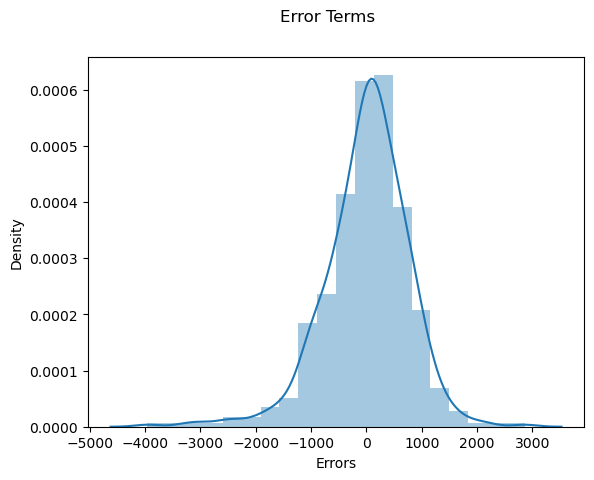

In [115]:
# plot the histogram of the error terms for the trained model
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')
plt.show()

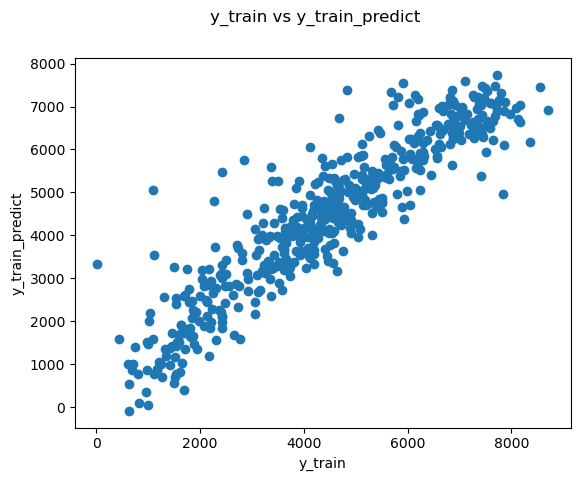

In [116]:
# plotting y_test and y_test_predict to check the spread
fig = plt.figure()
plt.scatter(y_train, y_train_predict)
fig.suptitle('y_train vs y_train_predict')
plt.xlabel('y_train')
plt.ylabel('y_train_predict')      
plt.show()

#### Calculating the R2 score for the training dataset

In [118]:
r2 = r2_score(y_train, y_train_predict)
print(f'R2 score for the training dataset = {round(r2,2)}')

R2 score for the training dataset = 0.85


#### Calculating the Adjusted R2 score for the training dataset

In [120]:
# number of rows in the dataset
n = X_train_lm.shape[0]

# number of features (predictors, p) in the model
p = X_train_lm.shape[1] - 1

#computing adjusted r2
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),2)
print(f'Adjusted R2 score for the training dataset = {adjusted_r2}')

Adjusted R2 score for the training dataset = 0.84


### Performing the scaling and evaluation of the trained model on the test dataset

In [122]:
#scaling the test dataset
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

In [123]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,light_snow_rain,mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,4546.981735,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,1898.633630,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,5869.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
#creating y_test and X_test from the test dataset
y_test = df_test.pop('cnt')
X_test = df_test

In [125]:
#dropping the columns which are not part of the model from the test dataset
cols_to_drop = [col for col in X_test.columns if col not in X_train.columns]
X_test = X_test.drop(cols_to_drop, axis = 1)

In [126]:
X_test_m = sm.add_constant(X_test)
y_test_predict = lr_final.predict(X_test_m)

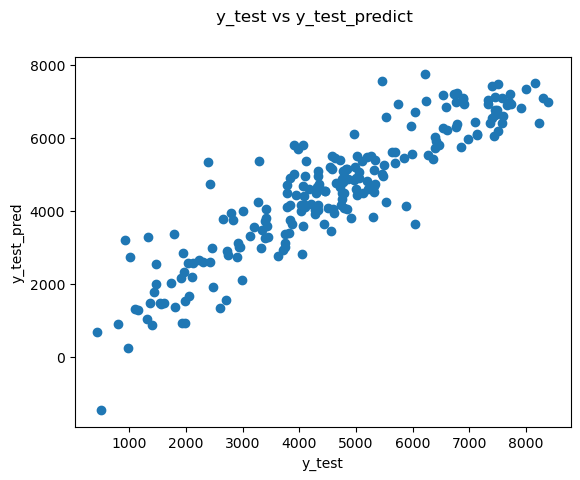

In [127]:
# plotting y_test and y_test_predict to check the spread
fig = plt.figure()
plt.scatter(y_test, y_test_predict)
fig.suptitle('y_test vs y_test_predict')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')      
plt.show()

#### Calculating the R2 score for the test dataset

In [129]:
r2 = r2_score(y_test, y_test_predict)
print(f'R2 score for the test dataset = {round(r2,2)}')

R2 score for the test dataset = 0.82


#### Calculating the Adjusted R2 score for the test dataset

In [131]:
# number of rows in the dataset
n = X_test_m.shape[0]

# number of features (predictors, p) in the model
p = X_test_m.shape[1] - 1

#computing adjusted r2
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),2)
print(f'Adjusted R2 score for the test dataset = {adjusted_r2}')

Adjusted R2 score for the test dataset = 0.8


### Conclusion

#### Driving factors for bike sharing demand
 - **temp**: Higher temperature increases the bike sharing demand.
 - **yr**: The year 2019 saw a higher bike sharing demand than 2018, with the limited data we have of 2 years, we can conclude with each year the bike sharing demand will tend to increase.
 - **winter**: In the winter season, the bike sharing demand increases.
 - **Mon**: On Mondays, the bike sharing demand incr
 - **spring**: In the spring season, the bike sharing demand decreases.
 - **misty_cloudy**: When the weather is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, the bike sharing demand decreases.
 - **windspeed**: With increase in windspeed, the bike sharing demand decreases.
 - **light_snow_rain**: When the weather is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, the bike sharing demand decreases even more.

#### Linear Regression Model
*cnt = 1759.601
21 x yr) + (476.512263 x workingday) + (3775.825649 x temp) - (1399.486413 x windspeed) - (622.921899 x spring) + 
        (294.112179 x summer) + (798.907749 x winter) - (420.100740 x Dec) - (459.263341 x Jan) - (407.437319 x Jul) - (407.513845 x Nov) +
        (562.880175 x Sep) + (583.509884 x Mon) - (2590.171766 x light_snow_rain) - (722.014713 x mist_cloudy)*

#### Evaluation Metrics
 - **R2 Score for training dataset** = 0.85
 - **Adjusted R2 score for the training dataset**: = 0.81
 - **R2 score for the test dataset**: 0.82
 - **Adjusted R2 score for the training dataset**: = 0.80

##### Impact of various feature on bike sharing demand

| Feature           | Impact        |
|-------------------|---------------|
| temp              | 3775.825649   |
| yr                | 2039.434821   |
| winter            | 798.907749    |
| Mon               | 583.509884    |
| Sep               | 562.880175    |
| workingday        | 476.512263    |
| summer            | 294.112179    |
| Jul               | -407.437319   |
| Nov               | -407.513845   |
| Dec               | -420.100740   |
| Jan               | -459.263341   |
| spring            | -622.921899   |
| Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist       | -722.014713   |
| windspeed         | -1399.486413  |
| Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   | -2590.171766  |